### Importamos las librerias necesarias

In [1]:
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import mitosheet
import pydotplus
from six import StringIO
from IPython.display import Image
from pydotplus import graph_from_dot_data

### Importamos el dataset

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

### Empezamos el analisis exploratorio explorando y entendiendo el dataset

In [3]:
df.keys()

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
df.describe(include=['O'])

,Gender
count,400
unique,2
top,Female
freq,204


In [9]:
prof = ProfileReport(df) 
prof.to_file('Social_Network_Ads_Original.html')

### Empezamos pasando la variable categoria Gender a numerica

In [14]:
df = pd.get_dummies(df,columns=["Gender"]) 

,User_ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1
...,...,...,...,...,...,...
395,15691863,46,41000,1,1,0
396,15706071,51,23000,1,0,1
397,15654296,50,20000,1,1,0
398,15755018,36,33000,0,0,1


### Eliminamos la columna id que nunca deberia influir en el target

In [15]:
df.pop('User_ID')

0      15624510
1      15810944
2      15668575
3      15603246
4      15804002
         ...   
395    15691863
396    15706071
397    15654296
398    15755018
399    15594041
Name: User_ID, Length: 400, dtype: int64

In [16]:
df

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


### Realizamos los analisis de correlacion entre las variables y el target que es Purchased

In [17]:
df[['Gender_Female', 'Purchased']].groupby(['Gender_Female'], as_index=False).mean().sort_values(by='Purchased', ascending=False)

,Gender_Female,Purchased
1,1,0.377451
0,0,0.336735


In [18]:
df[['Gender_Male', 'Purchased']].groupby(['Gender_Male'], as_index=False).mean().sort_values(by='Purchased', ascending=False)

,Gender_Male,Purchased
0,0,0.377451
1,1,0.336735


In [19]:
df[['EstimatedSalary', 'Purchased']].groupby(['EstimatedSalary'], as_index=False).mean().sort_values(by='Purchased', ascending=False)

,EstimatedSalary,Purchased
116,150000,1.0
29,46000,1.0
106,138000,1.0
105,137000,1.0
104,135000,1.0
...,...,...
49,68000,0.0
50,69000,0.0
1,16000,0.0
62,81000,0.0


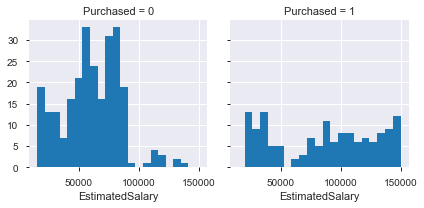

In [20]:
grid = sn.FacetGrid(df, col='Purchased')
grid.map(plt.hist, 'EstimatedSalary', bins=20)

In [21]:
df[['Age', 'Purchased']].groupby(['Age'], as_index=False).mean().sort_values(by='Purchased')

,Age,Purchased
0,18,0.0
1,19,0.0
2,20,0.0
3,21,0.0
4,22,0.0
...,...,...
37,55,1.0
38,56,1.0
39,57,1.0
40,58,1.0


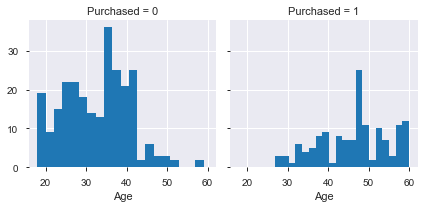

In [22]:
grid = sn.FacetGrid(df, col='Purchased')
grid.map(plt.hist, 'Age', bins=20)

### Usamos Mito para reordenar las columnas solo para que se vea mejor a la vista

In [23]:
mitosheet.sheet(df, analysis_to_replay="id-xoswchqnxh")

MitoWidget(analysis_data_json='{"analysisName": "id-krxfseyswm", "analysisToReplay": {"analysisName": "id-xosw…

In [24]:
from mitosheet import *; register_analysis("id-xoswchqnxh");
    
# Reordered column Purchased
df_columns = [col for col in df.columns if col != 'Purchased']
df_columns.insert(4, 'Purchased')
df = df[df_columns]


### Importamos el archivo salido de Mito para veificar el resultado y finalmente exportarlo para poder usarlo en los distintos algoritmos

In [25]:
df = pd.read_csv('MitoExport.csv')
df

,Age,EstimatedSalary,Gender_Female,Gender_Male,Purchased
0,19,19000,0,1,0
1,35,20000,0,1,0
2,26,43000,1,0,0
3,27,57000,1,0,0
4,19,76000,0,1,0
...,...,...,...,...,...
395,46,41000,1,0,1
396,51,23000,0,1,1
397,50,20000,1,0,1
398,36,33000,0,1,0


### Realizamos nuevamente el Profile Report despues de terminadoslos cambios para analizar la diferencia

In [27]:
prof = ProfileReport(df) 
prof.to_file('Social_Network_Ads_Out.html')

In [26]:
df.to_csv('Social_Network_Ads_Out.csv', index=False)